In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import pickle
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report, roc_curve, auc)

In [2]:
df=pd.read_csv("C:/Users/Elif/Downloads/dataset.csv")

In [3]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Precaution1,Precaution2,Precaution3,Precaution4
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0,bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,itching,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0,bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,skin rash,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0,bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
3,Fungal infection,itching,skin rash,dischromic patches,nodal skin eruptions,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0,bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
4,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0,bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths


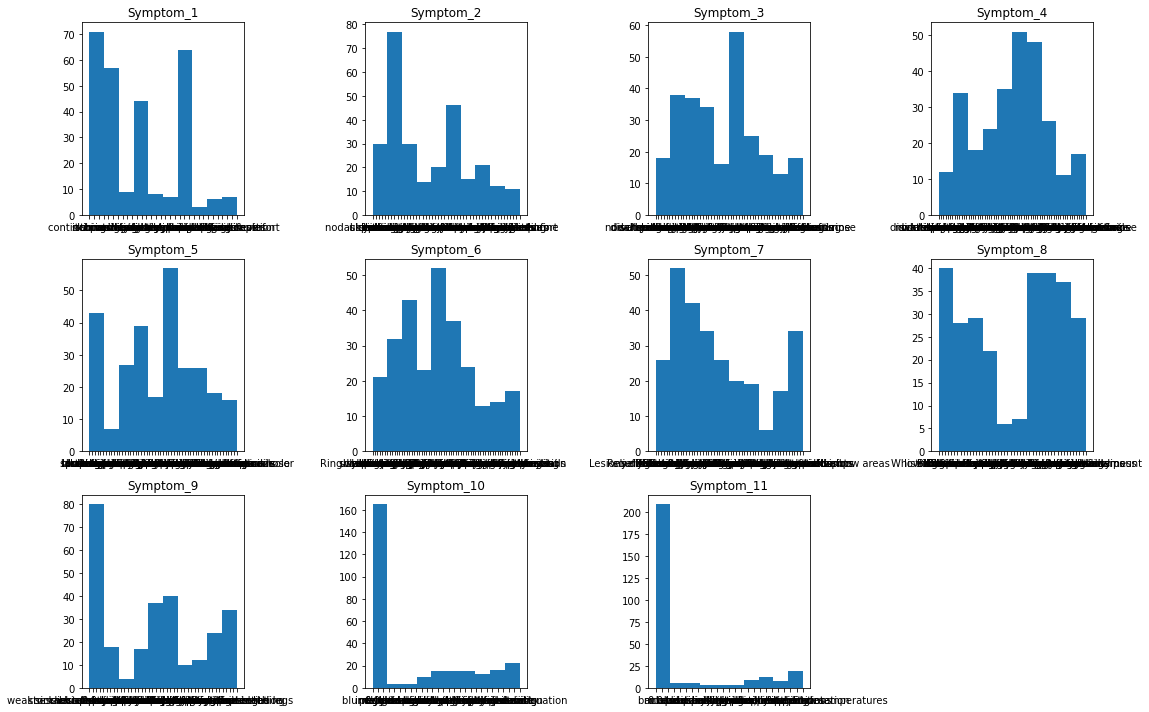

In [4]:
to_hist = ['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']

plt.figure(figsize=(16,10))
for idx, col in enumerate(to_hist):
    plt.subplot(3, 4, idx+1)
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout();

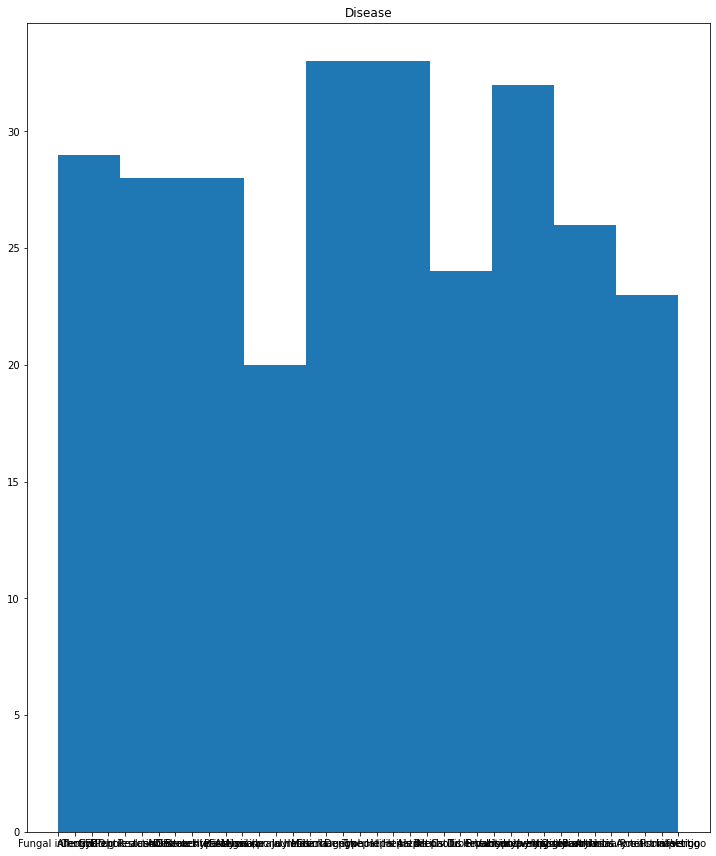

In [5]:
to_hist = ['Disease']

plt.figure(figsize=(40,35))
for idx, col in enumerate(to_hist):
    plt.subplot(3, 4, idx+1)
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout();

In [6]:
dfcorr=df.loc[:,['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']]

In [7]:
from sklearn.preprocessing import LabelEncoder
labencoder=LabelEncoder()
dfcorr.loc[:,['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']]=\
dfcorr.loc[:,['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']].apply(labencoder.fit_transform)

In [8]:
dfcorr.corr()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
Disease,1.000000,-0.284381,-0.041508,-0.075904,-0.028885,0.143573,-0.055550,-0.095494,0.017209,0.258446,0.099659,0.230734
Symptom_1,-0.284381,1.000000,-0.160419,0.005171,0.181732,-0.106685,-0.022687,-0.008199,-0.218575,0.015582,-0.065310,0.003512
Symptom_2,-0.041508,-0.160419,1.000000,-0.095461,0.098744,-0.148390,-0.057148,-0.193800,0.009350,0.063879,0.047584,-0.030834
Symptom_3,-0.075904,0.005171,-0.095461,1.000000,-0.285660,-0.035076,-0.025287,0.134608,0.123313,0.103528,-0.036021,0.076094
Symptom_4,-0.028885,0.181732,0.098744,-0.285660,1.000000,-0.131866,0.065472,0.030039,0.014248,0.073046,-0.119125,0.040719
Symptom_5,0.143573,-0.106685,-0.148390,-0.035076,-0.131866,1.000000,0.058339,0.042820,0.275670,0.049570,-0.122365,-0.081228
Symptom_6,-0.055550,-0.022687,-0.057148,-0.025287,0.065472,0.058339,1.000000,0.188136,-0.034398,0.051857,-0.166803,-0.293236
Symptom_7,-0.095494,-0.008199,-0.193800,0.134608,0.030039,0.042820,0.188136,1.000000,0.169972,0.071660,0.200667,0.031844
Symptom_8,0.017209,-0.218575,0.009350,0.123313,0.014248,0.275670,-0.034398,0.169972,1.000000,0.173073,0.209484,0.145542
Symptom_9,0.258446,0.015582,0.063879,0.103528,0.073046,0.049570,0.051857,0.071660,0.173073,1.000000,0.110052,0.305057


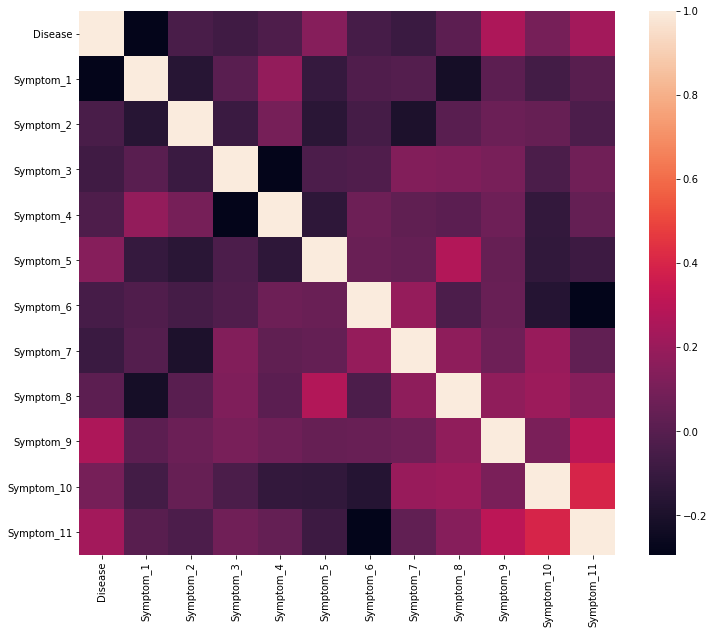

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(dfcorr.corr());

In [10]:
quick_sample = dfcorr.sample(253, random_state=1)
quick_sample_y = quick_sample['Disease']
quick_sample_x = quick_sample.drop('Disease', axis=1)

trial_forest = RandomForestClassifier()
trial_forest.fit(quick_sample_x, quick_sample_y)

RandomForestClassifier()

1.0


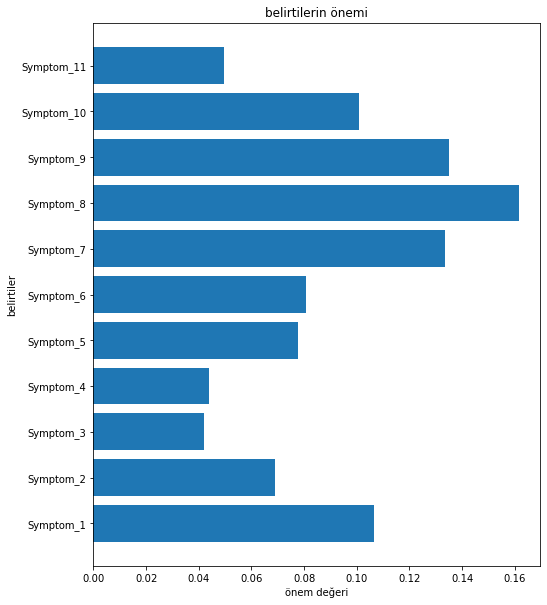

In [11]:
print(trial_forest.score(quick_sample_x, quick_sample_y))
n_features = quick_sample_x.shape[1]
plt.figure(figsize=(8,10))
plt.barh(range(n_features), trial_forest.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), quick_sample_x.columns) 
plt.xlabel("önem değeri")
plt.ylabel("belirtiler")
plt.title('belirtilerin önemi');

In [12]:
y = df['Disease']

In [13]:
#print ("Disease before apply encoding: ",np.unique(y))
#Y=labencoder.fit_transform(y)
#print("Disease after apply encoding:",np.unique(Y))

In [14]:
X=df.loc[:,['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']]

In [15]:

X.loc[:,['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']]=\
X.loc[:,['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']].apply(labencoder.fit_transform)

In [16]:
X.head(150)

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,13,35,34,15,0,1,2,0,0,0,0
1,23,27,17,27,0,1,2,0,0,0,0
2,13,27,16,49,0,1,2,0,0,0,0
3,13,35,16,36,0,1,2,0,0,0,0
4,13,35,34,15,0,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
145,14,42,53,11,33,30,16,32,40,16,1
146,14,42,53,11,33,30,5,32,40,16,9
147,9,22,53,11,27,4,51,46,22,21,19
148,13,22,53,11,27,4,51,46,22,21,19


In [17]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.30,random_state=42)

In [18]:
print("train shape:",X_train.shape)
print("test shape:",X_test.shape)


train shape: (193, 11)
test shape: (83, 11)


In [19]:
X_trainfirst = X_train.copy()
y_trainfirst= y_train.copy()
X_testfirst = X_test.copy()
y_testfirst = y_test.copy()

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
import sklearn.metrics as metrics
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
confusion= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
classification = classification_report(y_test, y_pred)
print("Classification Report:",)
print (classification)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 5]]
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         3
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         2
                                Allergy       1.00      1.00      1.00         2
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         2
                            Chicken pox       0.80      1.00      0.89         4
                    Chronic cholestasis       1.00      1.00      1.00         3
                            

C:\Users\cagla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cagla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cagla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
#from sklearn.metrics import mean_absolute_error , r2_score
#print("mean:", mean_absolute_error(y_test,y_pred))
#r2_score(y_test,y_pred)

In [23]:
y_test.shape


(83,)

In [24]:
y_pred.shape

(83,)

In [25]:
from sklearn.model_selection import  GridSearchCV
params = {'n_estimators': [50],'max_features': [5], 'max_depth': np.arange(1,20)}

grid_clf= GridSearchCV(clf, params, cv=5, n_jobs=-1)

grid_clf.fit(X_train, y_train)

C:\Users\cagla\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'max_features': [5], 'n_estimators': [50]})

In [26]:
print('Best score:', grid_clf.best_score_)
print('Best params:', grid_clf.best_params_)

Best score: 0.9635627530364372
Best params: {'max_depth': 19, 'max_features': 5, 'n_estimators': 50}


In [27]:
y_prediction = grid_clf.predict(X_test)

In [28]:
classification = classification_report(y_test, y_prediction)
print("Classification Report:",)
print (classification)
accuracy = accuracy_score(y_test,y_prediction)
print("Accuracy:",accuracy)

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         3
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         2
                                Allergy       1.00      1.00      1.00         2
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         2
                            Chicken pox       0.80      1.00      0.89         4
                    Chronic cholestasis       1.00      1.00      1.00         3
                                 Dengue       1.00      1.00      1.00         3
                               Diabetes       1.00      1.00      1.00         1
    

In [29]:
#from sklearn.metrics import mean_absolute_error , r2_score
#print("mean:", mean_absolute_error(y_test,y_prediction))
#r2_score(y_test,y_prediction)

In [30]:
y_test.shape

(83,)

In [31]:
y_prediction.shape

(83,)

In [32]:
pipe = Pipeline([('forest1', RandomForestClassifier(max_depth=20, max_features=5, n_estimators=100))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('forest1',
                 RandomForestClassifier(max_depth=20, max_features=5))])

In [33]:
y_predicted = pipe.predict(X_test)


In [34]:
classification = classification_report(y_test, y_predicted )
print("Classification Report:",)
print (classification)
accuracy = accuracy_score(y_test,y_predicted)
print("Accuracy:",accuracy)

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         3
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         2
                                Allergy       1.00      1.00      1.00         2
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         2
                            Chicken pox       0.80      1.00      0.89         4
                    Chronic cholestasis       1.00      1.00      1.00         3
                                 Dengue       1.00      0.67      0.80         3
                               Diabetes       1.00      1.00      1.00         1
    

C:\Users\cagla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cagla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cagla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
pipe.predict([[13,35,34,15,0,1,2,0,0,0,0]])

array(['Fungal infection'], dtype=object)

In [38]:
import pickle

filename = 'diagnosis.pkl'
pickle.dump(pipe, open(filename, 'wb'))

In [39]:
model = pickle.load(open('diagnosis.pkl','rb'))
print(model.predict([[13,35,34,15,0,1,2,0,0,0,0]]))

['Fungal infection']


In [40]:
pkl_filename = "diagnosis.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    

In [41]:
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 97.59 %


In [42]:
tuple_objects = (pipe, X_train, y_train, score)

In [43]:
pickle.dump(tuple_objects, open("tuple_model.pkl", 'wb'))


In [44]:
pickled_model, pickled_Xtrain, pickled_Ytrain, pickled_score = pickle.load(open("tuple_model.pkl", 'rb'))

In [45]:
import joblib
joblib_file = "joblib_model.pkl"
joblib.dump(pipe, joblib_file)

['joblib_model.pkl']

In [46]:
joblib_model = joblib.load(joblib_file)

In [47]:
score = joblib_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 97.59 %


In [48]:
pickle_model.predict([[22,8,50,9,20,47,50,38,0,0,0]])

array(['Allergy'], dtype=object)

In [49]:
pipe.predict([[13,35,34,15,0,1,2,0,0,0,0]])


array(['Fungal infection'], dtype=object)

In [57]:
p_disease=pipe.predict([[13,35,34,15,0,1,2,0,0,0,0]])

In [70]:
P_disease=labencoder.fit_transform(p_disease)
print("Disease after apply encoding:",np.unique(P_disease))

Disease after apply encoding: [0]


In [71]:
y1=df.loc[:,['Precaution1','Precaution2','Precaution3','Precaution4']]

In [72]:
from sklearn.multioutput import MultiOutputClassifier
X1=df['Disease']=\
X1=df.loc[:,['Disease']].apply(labencoder.fit_transform)

In [73]:
X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, test_size=0.2, random_state=1)

In [74]:
dsg=MultiOutputClassifier(RandomForestClassifier(random_state=1),n_jobs=-1)
dsg=dsg.fit(X1_train,y1_train)
y1_pred=dsg.predict(X1_test)

In [75]:
dsg.predict([P_disease])

array([['lie down', 'avoid sudden change in body',
        'avoid abrupt head movment', 'relax']], dtype=object)